In [236]:
import numpy as np
class Act:
    def __init__(self, start, end, dt=1, met="lin", c=2.):
        self.start = start
        self.end = end
        self.met = met
        self.c = c
        self.dt = dt
        
    def at(self, t):
        'print value of the variable at time t from start of Act'
        # clamp t outside dt to the limits
        if t < 0:
            t = self.start
            
        if t > self.dt:
            t = self.end
            
        # normalise t values so that they lie between 0 and 1
        tn = t/self.dt
        
        if self.met=="sig":
            y = 1./(1.+np.exp(-self.c*(tn-0.5)))
        elif self.met=="pow":
            y = tn**self.c
        else:
            y = tn
        # convert the y 0 to 1 values back to start and end values
        val = (y * (self.end - self.start)) + self.start
        
        return val

class Stage:
    def __init__(self):
        self.acts = []
            
    def add(self, Act):
        self.acts.append(Act)
        
    def total_time(self):
        total_time = 0.
        for a in self.acts:
            total_time += a.dt
        return total_time
    
    def begin_acts(self):
        'which Act in the list does time t reside?'
        times = [0]
        end_time = 0.
        for a in self.acts:
            end_time+=a.dt
            times.append(end_time)
            
        return np.array(times)
        
    def t(self,t):
        'evaluate Scene for a numpy array of times'
        
        # make a 2D array of 
        closest_act = t[:,np.newaxis]-self.begin_acts()

        # the location and smallest positive value in each row tells you the Act postion and the time t to look up
        nonegs = np.ma.masked_less(closest_act, 0)
        
        act_indices = np.ma.argmin(nonegs,axis=1)
        act_t_values = np.ma.min(nonegs,axis=1)
        
        out = np.zeros_like(act_t_values, dtype=np.float32)
        
        for i, (actpos, t) in enumerate(zip(act_indices,act_t_values)):
            out[i] = self.acts[actpos].at(t)
            
        return out
        

In [237]:
a = Stage()
a.add(Act(1,2,1))
a.add(Act(2,-1,8,'pow',0.1))
a.add(Act(-1,0,10))
a.add(Act(0,np.pi,5))
a.add(Act(np.pi,2,.5))

a.acts
a.begin_acts()

array([ 0. ,  1. ,  9. , 19. , 24. , 24.5])

In [238]:
a.total_time()

24.5

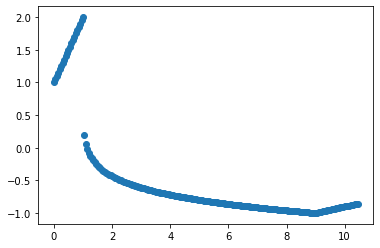

In [239]:
import matplotlib.pyplot as plt
t = np.arange(0,10.5,0.05)
plt.scatter(t, a.t(t))

## power law

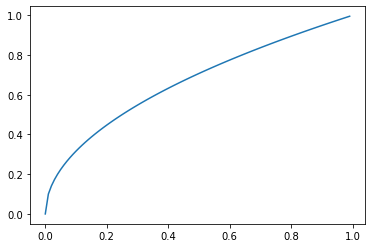

In [243]:
x = np.arange(0,1,0.01)
c = 0.5
plt.plot(x,x**c)

## sigmoid


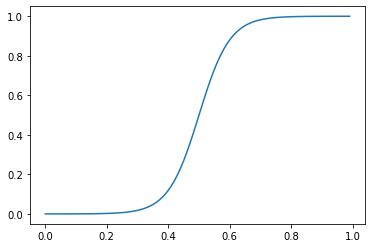

In [241]:
c=20
plt.plot(x,1./(1.+np.exp(-c*(x-0.5))))